In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/questionansweringgpt2-cars/Final_QAS_data_prefinetuning.csv


In [ ]:
pip install --upgrade transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 35.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.4
    Uninstalling transformers-4.27.4:
      Successfully uninstalled transformers-4.27.4
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel, AdamW, get_linear_schedule_with_warmup

In [ ]:
# Load the CSV dataset
df = pd.read_csv('/kaggle/input/questionansweringgpt2-cars/Final_QAS_data_prefinetuning.csv')


<AxesSubplot:>

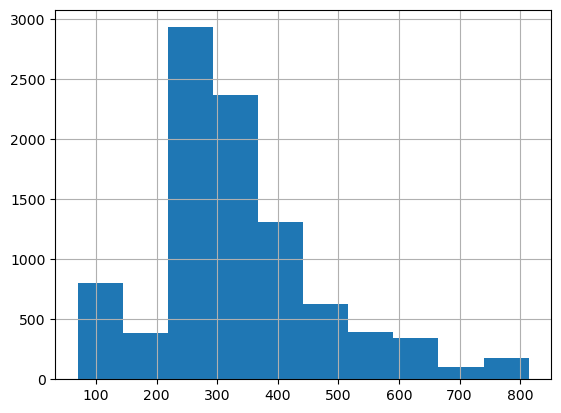

In [ ]:
df['context'].str.split().str.len().hist()

In [ ]:
df.head()

,question,answer,start_pos,end_pos,context
0,What is the horsepower rating of the engine in...,120,73,86,The jeep wrangler 1998 is a vehicle with a Inl...
1,What is the horsepower output of the toyota 4r...,245,68,81,The toyota 4runner 2005 is a vehicle with a V6...
2,What is the horsepower rating of the engine in...,190,67,80,The toyota tundra 2002 is a vehicle with a V6 ...
3,What is the horsepower output of the toyota ta...,142,73,86,The toyota tacoma 1998 is a vehicle with a Inl...
4,How many horsepower does the ford ranger 1990'...,100,71,84,The ford ranger 1990 is a vehicle with a Inlin...


In [ ]:
qa_pairs = []
for index, q in df.iterrows():
    qa_pairs.append(q['context'] + ' ' + q['question'] + ' [SEP] ' + q['answer'])

In [ ]:
!conda install -y gdown

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - rapidsai/linux-64::libcuml==21.12.00=cuda11_g04c4927f3_0
  - conda-forge/linux-64::abseil-cpp==20211102.0=h93e1e8c_3
  - rapidsai/linux-64::dask-cudf==21.12.02=cuda_11_py37_g06540b9b37_0
  - conda-forge/linux-64::pyarrow==5.0.0=py37h8cf84b7_35_cuda
  - rapidsai/linux-64::cuml==21.12.00=cuda11_py37_g04c4927f3_0
  - conda-forge/linux-64::grpc-cpp==1.45.2=he70e3f0_3
  - rapidsai/linux-64::libcudf==21.12.02=cuda11_g06540b9b37_0
  - conda-forge/linux-64::arrow-cpp==5.0.0=py37h846d386_35_cuda
  - rapidsai/linux-64::cudf==21.12.02=cuda_11_py37_g06540b9b37_0
  - conda-forge/noarch::parquet-cpp==1.5.1=2
  - conda-forge/linux-64::libabseil==20211102.0=cxx17_h48a1fff_3
done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-

In [ ]:
# https://drive.google.com/file/d//view?usp=share_link

In [ ]:
!gdown --id 1ivZc4FbVM4eNmP6q6MwkD7m4w_pkHRzX #17qBwI-JRxLARe2krOQLVj_87_xvwAEuu

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:130: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From (uriginal): https://drive.google.com/uc?id=1ivZc4FbVM4eNmP6q6MwkD7m4w_pkHRzX
From (redirected): https://drive.google.com/uc?id=1ivZc4FbVM4eNmP6q6MwkD7m4w_pkHRzX&confirm=t&uuid=f93baa38-6d2c-4d55-aa45-33279e8044ec
To: /kaggle/working/PreFineTune_engine_type_And_Drive_Type.zip
100%|████████████████████████████████████████| 463M/463M [00:08<00:00, 56.9MB/s]


In [ ]:
! unzip "/kaggle/working/PreFineTune_engine_type_And_Drive_Type.zip" -d PreFineTune_engine_type_And_Drive_Type  

Archive:  /kaggle/working/PreFineTune_engine_type_And_Drive_Type.zip
  inflating: PreFineTune_engine_type_And_Drive_Type/config.json  
  inflating: PreFineTune_engine_type_And_Drive_Type/pytorch_model.bin  


In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('/kaggle/working/PreFineTune_engine_type_And_Drive_Type')

Some weights of the model checkpoint at /kaggle/working/PreFineTune_engine_type_And_Drive_Type were not used when initializing GPT2LMHeadModel: ['score.weight']
- This IS expected if you are initializing GPT2LMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2LMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

In [ ]:
tokenizer.pad_token = tokenizer.eos_token

In [ ]:
encoded = tokenizer(qa_pairs, padding=True, truncation=True, return_tensors='pt')

In [ ]:
input_ids = encoded['input_ids']
attention_mask = encoded['attention_mask']
labels = input_ids.clone()

In [ ]:
for i, qa in df.iterrows():
    answer = qa['answer']
    answer_start = qa['start_pos']
    answer_end = answer_start + len(answer)
    labels[i, answer_start:answer_end] = input_ids[i, answer_start:answer_end]


In [ ]:
optimizer = AdamW(model.parameters(), lr=1e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=100, num_training_steps=1000)
model.train()

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:395: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dro

In [ ]:
# Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, random_state=42, test_size=0.2)

# Split the masks into training and validation sets
train_masks, validation_masks, _, _ = train_test_split(attention_mask, input_ids, random_state=42, test_size=0.2)

# Convert all of our data into torch tensors, the required datatype for our model
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning:

In [ ]:
from tqdm.auto import tqdm

In [ ]:
batch_size = 2

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

train_data = TensorDataset(train_inputs, train_masks, train_labels)

train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)

validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
# Load the AdamW optimizer
optimizer = AdamW(model.parameters(), lr=5e-5, eps=1e-8)

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * 3

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=2).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:395: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
# Store the average loss after each epoch so we can plot them.
loss_values = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(device)
# For each epoch...
for epoch_i in tqdm(range(0, 3)):
    
        # ========================================
        #               Training
        # ========================================
    
        # Perform one full pass over the training set.
    
        # Put the model into training mode. Don't be mislead--the call to `train` just changes the *mode*, it doesn't *perform* the training.
        # `dropout` and `batchnorm` layers behave differently during training vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
        model.train()
    
        # Tracking variables
        tr_loss = 0
        nb_tr_examples, nb_tr_steps = 0, 0
    
        # Train the data for one epoch
        for step, batch in enumerate(tqdm(train_dataloader)):
            # Add batch to GPU
            batch = tuple(t.to(device) for t in batch)
            # Unpack the inputs from our dataloader
            b_input_ids, b_input_mask, b_labels = batch
            # Clear out the gradients (by default they accumulate)
            optimizer.zero_grad()
            # Forward pass
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
            loss = outputs[0]
            logits = outputs[1]
            # Backward pass
            loss.backward()
            # Update parameters and take a step using the computed gradient
            optimizer.step()
            # Update the learning rate.
            scheduler.step()
    
            # Update tracking variables
            tr_loss += loss.item()
            nb_tr_examples += b_input_ids.size(0)
            nb_tr_steps += 1
            if step % 200 == 0:
                print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
        print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
        # ========================================
        #               Validation
        # ========================================
        # After the completion of each training epoch, measure our performance on
        # our validation set.
    
        # Put the model into evaluation mode--the dropout layers behave differently
        # during evaluation.
        model.eval()
    
        # Tracking variables
        eval_loss, eval_accuracy = 0, 0
        nb_eval_steps, nb_eval_examples = 0, 0
    
        # Evaluate data for one epoch
        for batch in validation_dataloader:
            # Add batch to GPU
            batch = tuple(t.to(device) for t in batch)
            # Unpack the inputs from our dataloader
            b_input_ids, b_input_mask, b_labels = batch

cuda


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3769 [00:00<?, ?it/s]

Train loss: 10.680669784545898
Train loss: 1.6136097758267056
Train loss: 1.433538445139169
Train loss: 1.3583810826307923
Train loss: 1.314329263646058
Train loss: 1.2734218952018064
Train loss: 1.2490824466504522
Train loss: 1.2268767876392344
Train loss: 1.2078102748191855
Train loss: 1.1938053362447973
Train loss: 1.1778986785581325
Train loss: 1.1661531726733656
Train loss: 1.1546525313972384
Train loss: 1.1439366188360058
Train loss: 1.1340450882188169
Train loss: 1.1235310343186962
Train loss: 1.1142081480283583
Train loss: 1.1056207128611777
Train loss: 1.0988460589128877
Train loss: 1.0923004470672681


  0%|          | 0/3769 [00:00<?, ?it/s]

Train loss: 1.3521559238433838
Train loss: 0.9138702323187643
Train loss: 0.9265371278634392
Train loss: 0.9290278836117807
Train loss: 0.9217352269963826
Train loss: 0.9177255950696938
Train loss: 0.9160215076583311
Train loss: 0.9110595791425814
Train loss: 0.901764220663397
Train loss: 0.8967423280726897
Train loss: 0.8962230046392827
Train loss: 0.8947280893954485
Train loss: 0.8925843236332558
Train loss: 0.8921142945833066
Train loss: 0.8910363069251686
Train loss: 0.8890841136792329
Train loss: 0.8856325239927666
Train loss: 0.8853587100216043
Train loss: 0.8829817190110452
Train loss: 0.8817958849192883


  0%|          | 0/3769 [00:00<?, ?it/s]

Train loss: 1.0573992729187012
Train loss: 0.8351135414408807
Train loss: 0.8113905857142962
Train loss: 0.825494384520165
Train loss: 0.8191689646031972
Train loss: 0.8223079142945035
Train loss: 0.8174004310697044
Train loss: 0.8142454422834854
Train loss: 0.8160811182481471
Train loss: 0.8140119209591876
Train loss: 0.8109106720517809
Train loss: 0.8114210278157996
Train loss: 0.8105710986450855
Train loss: 0.8081787770677763
Train loss: 0.8070483951696708
Train loss: 0.8064573949295376
Train loss: 0.8044793519753846
Train loss: 0.8031117489161088
Train loss: 0.8022033158535594
Train loss: 0.8024635913854222


In [ ]:
model.save_pretrained('PreFineTune_question_answering_engine_type_And_Drive_Type')

In [ ]:
import shutil
shutil.make_archive("PreFineTune_question_answering_engine_type_And_Drive_Type", 'zip', "/kaggle/working/PreFineTune_question_answering_engine_type_And_Drive_Type")

'/kaggle/working/PreFineTune_question_answering_engine_type_And_Drive_Type.zip'

In [ ]:
from IPython.display import FileLink
FileLink(r'/kaggle/working/PreFineTune_question_answering_engine_type_And_Drive_Type.zip')

/kaggle/working/PreFineTune_question_answering_engine_type_And_Drive_Type.zip

In [ ]:
%cd /kaggle/working

/kaggle/working


In [ ]:
 FileLink(r'PreFineTune_question_answering_engine_type_And_Drive_Type.zip')

/kaggle/working/PreFineTune_question_answering_engine_type_And_Drive_Type.zip

In [ ]:
GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False))
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)))
      ...
      (6): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False))
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )))
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True))
  (lm_head): Linear(in_features=768, out_features=50257, bias=False))